In [1]:
import numpy as np
import pandas as pd
import tensorflow as tf
import matplotlib.pyplot as plt

from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, BatchNormalization

In [2]:
# Load data into a DataFrame
dataset = load_iris()
df = pd.DataFrame(dataset.data, columns=dataset.feature_names)

# Append "target" and name it "label"
df['label'] = dataset.target

# Use string label instead
df['label'] = df.label.replace(dict(enumerate(dataset.target_names)))

In [3]:
df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),label
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


In [4]:
# Transform label to one-hot encoding
label = pd.get_dummies(df['label'], prefix='label')
df = pd.concat([df, label], axis=1)

# Drop old label
df.drop(['label'], axis=1, inplace=True)

In [5]:
df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),label_setosa,label_versicolor,label_virginica
0,5.1,3.5,1.4,0.2,1,0,0
1,4.9,3.0,1.4,0.2,1,0,0
2,4.7,3.2,1.3,0.2,1,0,0
3,4.6,3.1,1.5,0.2,1,0,0
4,5.0,3.6,1.4,0.2,1,0,0


In [6]:
# Creating X and y

# Convert DataFrame into np array
X = df[['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)', 'petal width (cm)']]
X = np.asarray(X)

# Convert DataFrame into np array
y = df[['label_setosa', 'label_versicolor', 'label_virginica']]
y = np.asarray(y)

In [7]:
# Split the data set in a training set (80%) and a test set (20%)
X_train, X_test, y_train, y_test = train_test_split(
  X,
  y,
  test_size=0.20,
  random_state=42
)

In [8]:
# Model with batch normalization
model = Sequential([
    Dense(64, input_shape=(4,), activation="relu"),
    BatchNormalization(),
    Dense(128, activation='relu'),
    BatchNormalization(),
    Dense(128, activation='relu'),
    BatchNormalization(),
    Dense(64, activation='relu'),
    BatchNormalization(),
    Dense(64, activation='relu'),
    BatchNormalization(),
    Dense(3, activation='softmax')
]);

model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 64)                320       
                                                                 
 batch_normalization (BatchN  (None, 64)               256       
 ormalization)                                                   
                                                                 
 dense_1 (Dense)             (None, 128)               8320      
                                                                 
 batch_normalization_1 (Batc  (None, 128)              512       
 hNormalization)                                                 
                                                                 
 dense_2 (Dense)             (None, 128)               16512     
                                                                 
 batch_normalization_2 (Batc  (None, 128)              5

In [9]:
model.compile(
    optimizer='adam', 
    loss='categorical_crossentropy', 
    metrics=['accuracy']
)

In [10]:
history = model.fit(
    X_train, 
    y_train, 
    epochs=200, 
    validation_split=0.25, 
    batch_size=40, 
    verbose=2
)

Epoch 1/200
3/3 - 1s - loss: 1.1672 - accuracy: 0.5000 - val_loss: 1.0862 - val_accuracy: 0.3667 - 1s/epoch - 461ms/step
Epoch 2/200
3/3 - 0s - loss: 0.2616 - accuracy: 0.9444 - val_loss: 1.0612 - val_accuracy: 0.7000 - 33ms/epoch - 11ms/step
Epoch 3/200
3/3 - 0s - loss: 0.1452 - accuracy: 0.9778 - val_loss: 1.0402 - val_accuracy: 0.5000 - 32ms/epoch - 11ms/step
Epoch 4/200
3/3 - 0s - loss: 0.1291 - accuracy: 0.9556 - val_loss: 1.0199 - val_accuracy: 0.4000 - 34ms/epoch - 11ms/step
Epoch 5/200
3/3 - 0s - loss: 0.1246 - accuracy: 0.9667 - val_loss: 0.9988 - val_accuracy: 0.4000 - 33ms/epoch - 11ms/step
Epoch 6/200
3/3 - 0s - loss: 0.1047 - accuracy: 0.9667 - val_loss: 0.9846 - val_accuracy: 0.4000 - 35ms/epoch - 12ms/step
Epoch 7/200
3/3 - 0s - loss: 0.0798 - accuracy: 0.9778 - val_loss: 0.9758 - val_accuracy: 0.4000 - 34ms/epoch - 11ms/step
Epoch 8/200
3/3 - 0s - loss: 0.0886 - accuracy: 0.9778 - val_loss: 0.9691 - val_accuracy: 0.4000 - 33ms/epoch - 11ms/step
Epoch 9/200
3/3 - 0s - lo

Epoch 68/200
3/3 - 0s - loss: 0.0630 - accuracy: 0.9778 - val_loss: 0.2035 - val_accuracy: 0.9333 - 31ms/epoch - 10ms/step
Epoch 69/200
3/3 - 0s - loss: 0.0374 - accuracy: 0.9778 - val_loss: 0.2036 - val_accuracy: 0.9333 - 30ms/epoch - 10ms/step
Epoch 70/200
3/3 - 0s - loss: 0.0212 - accuracy: 0.9889 - val_loss: 0.2056 - val_accuracy: 0.9000 - 31ms/epoch - 10ms/step
Epoch 71/200
3/3 - 0s - loss: 0.0419 - accuracy: 0.9778 - val_loss: 0.1940 - val_accuracy: 0.9333 - 30ms/epoch - 10ms/step
Epoch 72/200
3/3 - 0s - loss: 0.0957 - accuracy: 0.9556 - val_loss: 0.1820 - val_accuracy: 0.9333 - 32ms/epoch - 11ms/step
Epoch 73/200
3/3 - 0s - loss: 0.0253 - accuracy: 1.0000 - val_loss: 0.1814 - val_accuracy: 0.9333 - 31ms/epoch - 10ms/step
Epoch 74/200
3/3 - 0s - loss: 0.0386 - accuracy: 0.9889 - val_loss: 0.1725 - val_accuracy: 0.9333 - 31ms/epoch - 10ms/step
Epoch 75/200
3/3 - 0s - loss: 0.0174 - accuracy: 1.0000 - val_loss: 0.1547 - val_accuracy: 0.9333 - 31ms/epoch - 10ms/step
Epoch 76/200
3/3

Epoch 135/200
3/3 - 0s - loss: 0.0232 - accuracy: 0.9889 - val_loss: 0.0107 - val_accuracy: 1.0000 - 41ms/epoch - 14ms/step
Epoch 136/200
3/3 - 0s - loss: 0.0122 - accuracy: 1.0000 - val_loss: 0.0096 - val_accuracy: 1.0000 - 31ms/epoch - 10ms/step
Epoch 137/200
3/3 - 0s - loss: 0.0668 - accuracy: 0.9778 - val_loss: 0.0105 - val_accuracy: 1.0000 - 30ms/epoch - 10ms/step
Epoch 138/200
3/3 - 0s - loss: 0.0586 - accuracy: 0.9778 - val_loss: 0.0225 - val_accuracy: 1.0000 - 31ms/epoch - 10ms/step
Epoch 139/200
3/3 - 0s - loss: 0.0656 - accuracy: 0.9778 - val_loss: 0.0590 - val_accuracy: 0.9667 - 32ms/epoch - 11ms/step
Epoch 140/200
3/3 - 0s - loss: 0.1289 - accuracy: 0.9667 - val_loss: 0.0860 - val_accuracy: 0.9667 - 30ms/epoch - 10ms/step
Epoch 141/200
3/3 - 0s - loss: 0.1196 - accuracy: 0.9556 - val_loss: 0.0923 - val_accuracy: 0.9333 - 30ms/epoch - 10ms/step
Epoch 142/200
3/3 - 0s - loss: 0.0375 - accuracy: 0.9889 - val_loss: 0.1173 - val_accuracy: 0.9667 - 30ms/epoch - 10ms/step
Epoch 14

In [11]:
%matplotlib inline
%config InlineBackend.figure_format = 'svg'
def plot_metric(history, metric):
    train_metrics = history.history[metric]
    val_metrics = history.history['val_' + metric]
    epochs = range(1, len(train_metrics) + 1)
    plt.plot(epochs, train_metrics)
    plt.plot(epochs, val_metrics)
    plt.title('Training and validation ' + metric)
    plt.xlabel("Epochs")
    plt.ylabel(metric)
    plt.legend(["train_"+metric, 'val_' + metric])
    plt.show()

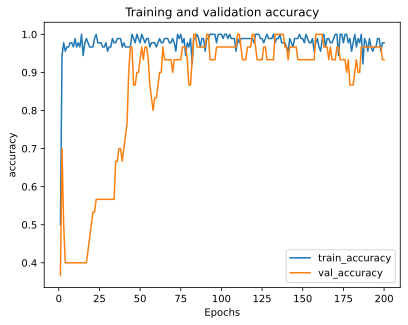

In [12]:
plot_metric(history, 'accuracy')

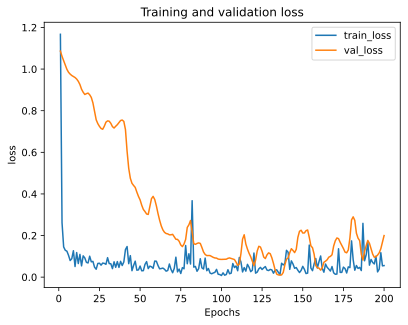

In [13]:
plot_metric(history, 'loss')

In [14]:
model.evaluate(X_test, y_test, verbose=2)

1/1 - 0s - loss: 0.0687 - accuracy: 0.9667 - 20ms/epoch - 20ms/step


[0.06870096176862717, 0.9666666388511658]